In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading dataset.
df = pd.read_csv(r'../data/CPD_Reported_Shootings_20250710.csv')

# remove all rows with a null value
df_clean = df.dropna()
print(df_clean.isnull().sum())

District                          0
StreetBlock                       0
LATITUDE_X                        0
LONGITUDE_X                       0
SNA_NEIGHBORHOOD                  0
ShootID                           0
RMS_No                            0
Race                              0
Sex                               0
Age                               0
Type                              0
YearOccurred                      0
DateOccurred                      0
TimeOccurred                      0
DateTimeOccured                   0
COMMUNITY_COUNCIL_NEIGHBORHOOD    0
dtype: int64


In [3]:
# looking at 2023 shootings
# filtering for 2023 only!
df_2024 = df_clean[df_clean['YearOccurred'] == 2024]
print(f"Total shootings in 2023: {len(df_2024)}")

Total shootings in 2023: 347


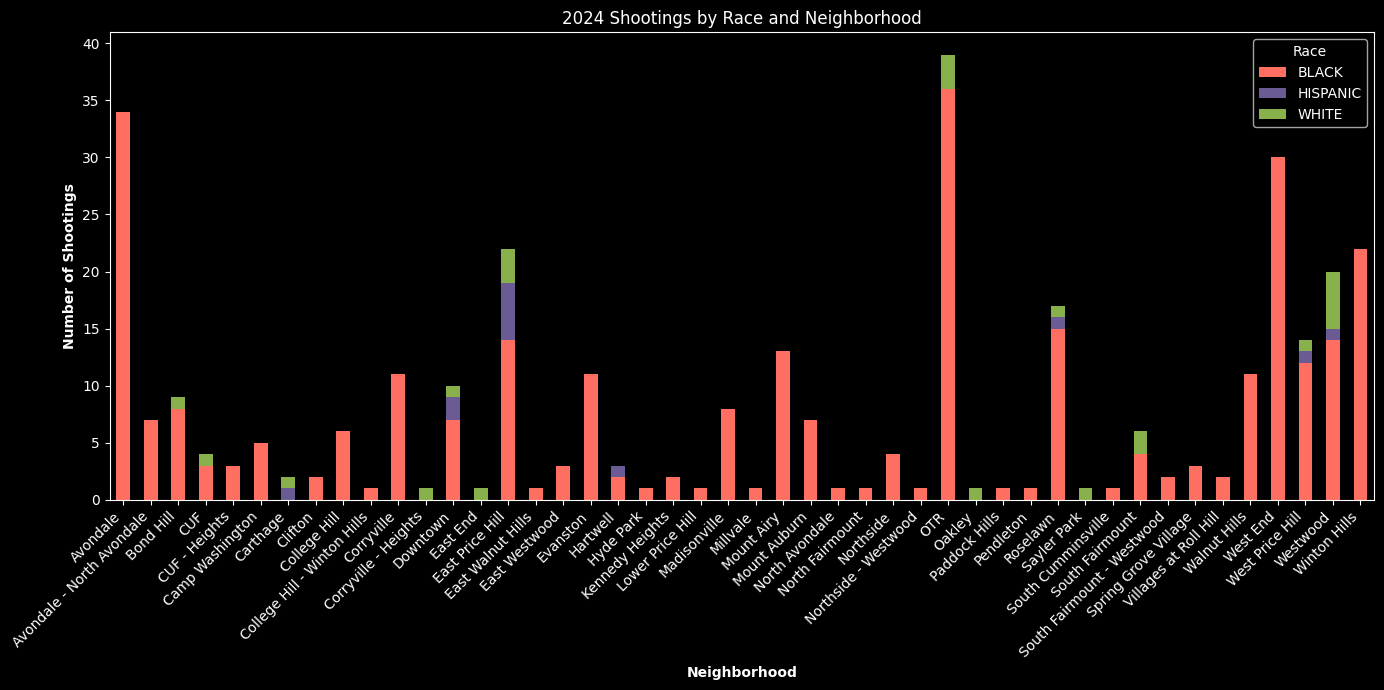

Shootings per 100,000 residents in Cincinnati in 2024: 111.54
Average shootings per day:  1.10


In [5]:
# group by race and neighborhood
race_neighborhood_2024 = df_2024.groupby(['Race', 
                                          'COMMUNITY_COUNCIL_NEIGHBORHOOD']).size().unstack(fill_value=0)

# visualize
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9'] #pre selected colors
plt.style.use('dark_background') # dark theme

race_neighborhood_2024.T.plot(
    kind = 'bar',
    stacked=True,
    figsize=(14,7),
    color = colors,
    title = '2024 Shootings by Race and Neighborhood'
)

plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# total shootings in Cincinnati 2024 per 100,000 residents
total_shootings = df_2024.shape[0]
city_population = 311097

shootings_per_100k = (total_shootings / city_population) * 100000
print(f'Shootings per 100,000 residents in Cincinnati in 2024: {shootings_per_100k:.2f}')

# sum of shootings per day
total_shootings_per_year = 401
shootings_per_day = total_shootings_per_year / 365
print(f'Average shootings per day: {shootings_per_day: .2f}')

In [7]:
# show a text version of results
print("2023 Shootings by Race and Neighborhood:\n")
print(race_neighborhood_2024)

2023 Shootings by Race and Neighborhood:

COMMUNITY_COUNCIL_NEIGHBORHOOD  Avondale  Avondale - North Avondale  \
Race                                                                  
BLACK                                 34                          7   
HISPANIC                               0                          0   
WHITE                                  0                          0   

COMMUNITY_COUNCIL_NEIGHBORHOOD  Bond Hill  CUF  CUF - Heights  \
Race                                                            
BLACK                                   8    3              3   
HISPANIC                                0    0              0   
WHITE                                   1    1              0   

COMMUNITY_COUNCIL_NEIGHBORHOOD  Camp Washington  Carthage  Clifton  \
Race                                                                 
BLACK                                         5         0        2   
HISPANIC                                      0         1        0

In [9]:
# Define age bins and labels
bins = [0, 17, 25, 32, 39, 46, 53, 60, 150]
labels = ['<18', '18-25', '26-32', '33-39', '40-46', '47-53', '54-60', '60+']

# Bin the Age column
df_2024 = df_2024.copy()
df_2024['AgeRange'] = pd.cut(df_2024['Age'], bins=bins, labels=labels, right=True)

# Group by AgeRange, Sex, Race, and Type
result = df_2024.groupby(['AgeRange', 'Sex', 'Race', 'Type'], observed=True).size().reset_index(name='Count')

# Show the grouped result
print(result)

   AgeRange     Sex      Race      Type  Count
0       <18  FEMALE     BLACK     FATAL      1
1       <18  FEMALE     BLACK  NONFATAL      5
2       <18    MALE     BLACK     FATAL      3
3       <18    MALE     BLACK  NONFATAL     31
4       <18    MALE  HISPANIC  NONFATAL      1
5     18-25  FEMALE     BLACK     FATAL      2
6     18-25  FEMALE     BLACK  NONFATAL      9
7     18-25  FEMALE     WHITE  NONFATAL      4
8     18-25    MALE     BLACK     FATAL     10
9     18-25    MALE     BLACK  NONFATAL     65
10    18-25    MALE  HISPANIC     FATAL      1
11    18-25    MALE  HISPANIC  NONFATAL      4
12    18-25    MALE     WHITE     FATAL      1
13    18-25    MALE     WHITE  NONFATAL      1
14    26-32  FEMALE     BLACK     FATAL      1
15    26-32  FEMALE     BLACK  NONFATAL      9
16    26-32  FEMALE     WHITE  NONFATAL      1
17    26-32    MALE     BLACK     FATAL     10
18    26-32    MALE     BLACK  NONFATAL     46
19    26-32    MALE  HISPANIC     FATAL      2
20    26-32  

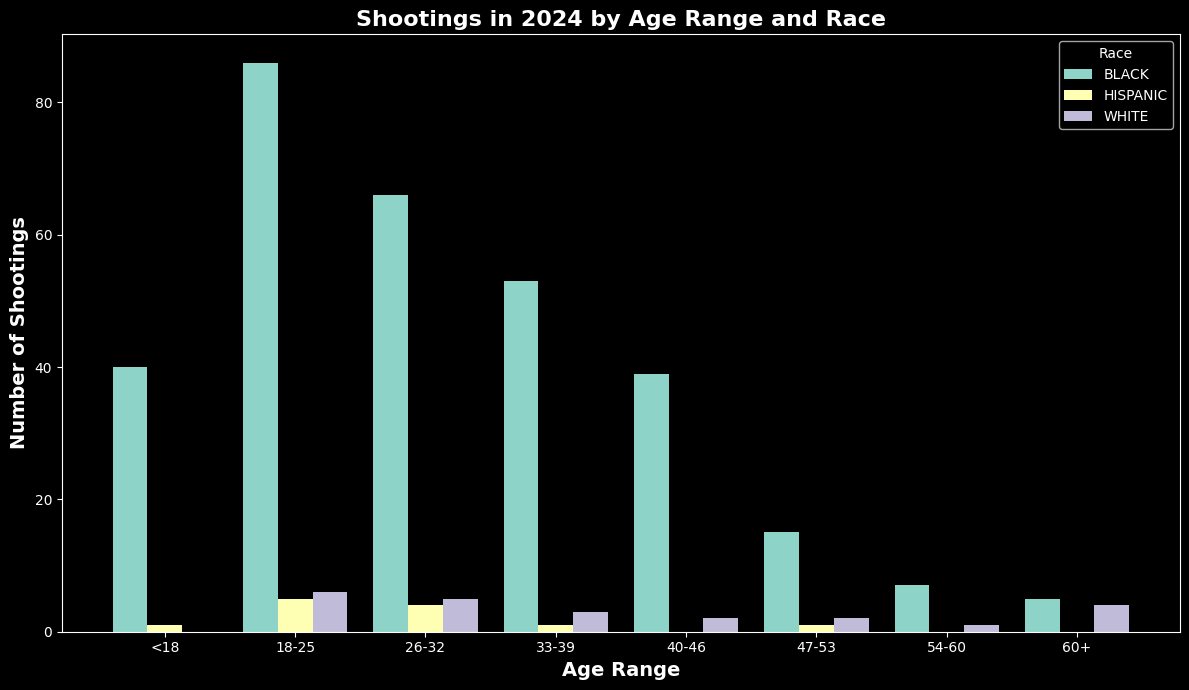

In [11]:
# Aggregate counts by AgeRange and Race only (sum over Sex and Type)
agg_result = result.groupby(['AgeRange', 'Race'], observed=True)['Count'].sum().reset_index()

# Now pivot safely
pivot_df = agg_result.pivot(index='AgeRange', columns='Race', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Number of bars per group and bar width
n_groups = len(pivot_df.index)
n_bars = len(pivot_df.columns)
bar_width = 0.8 / n_bars # total width split among bars

# Positions of groups on x-axis
indices = np.arange(n_groups)

# Plot each race's bars
for i, race in enumerate(pivot_df.columns):
    ax.bar(indices + i*bar_width, pivot_df[race], width=bar_width, label=race)

# Labels and title
ax.set_xlabel('Age Range', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Shootings', fontsize=14, fontweight='bold')
ax.set_title('Shootings in 2024 by Age Range and Race', fontsize=16, fontweight='bold')

# X-ticks in the middle of grouped bars
ax.set_xticks(indices + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(pivot_df.index)

# Legend
ax.legend(title='Race')

plt.tight_layout()
plt.show()

Type
NONFATAL    286
FATAL        61
Name: count, dtype: int64


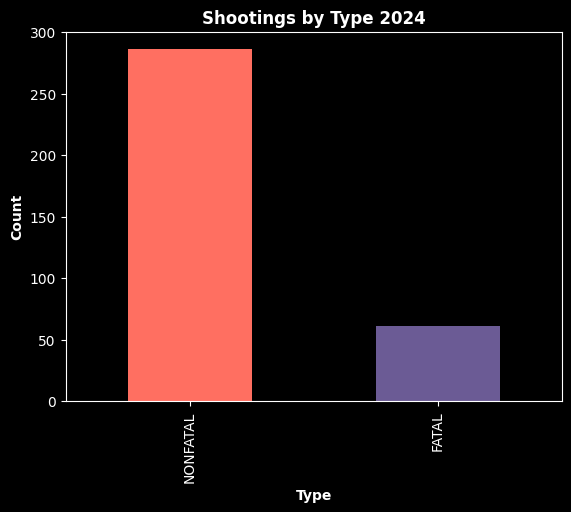

In [12]:
shooting_type_count = df_2024['Type'].value_counts()
print(shooting_type_count)
shooting_type_count.plot(kind='bar',
                         color=colors)
plt.title('Shootings by Type 2024', fontweight='bold')
plt.xlabel('Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

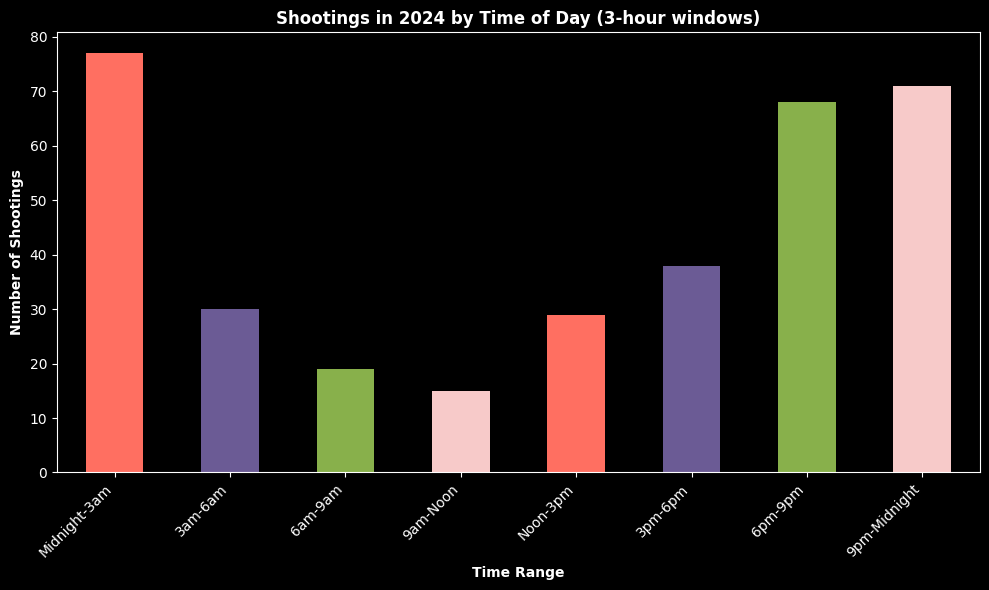

In [13]:
# Extract the hour properly from HHMMSS format
df_2024['Hour'] = (df_2024['TimeOccurred'] // 10000).astype(int)

# Define 3-hour bins and labels
bins = list(range(0, 25, 3))
labels = ['Midnight-3am', '3am-6am', '6am-9am', '9am-Noon', 
          'Noon-3pm', '3pm-6pm', '6pm-9pm', '9pm-Midnight']

# Bin the Hour into 3-hour time windows
df_2024['TimeBin'] = pd.cut(df_2024['Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count shootings per TimeBin
timebin_counts = df_2024.groupby('TimeBin', observed=True).size()

# Plot the shootings by 3-hour time bins
plt.figure(figsize=(10,6))
timebin_counts.plot(kind='bar', color=colors)
plt.title('Shootings in 2024 by Time of Day (3-hour windows)', fontweight='bold')
plt.xlabel('Time Range', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()